In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator

In [7]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation, RandomZoom, RandomContrast, RandomTranslation

In [3]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

In [10]:

img = load_img("/content/drive/My Drive/Colab Notebooks/Chessman-image-dataset/Chess/Bishop/00000000.JPG")


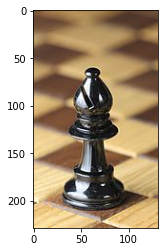

In [11]:
plt.imshow(img)

In [12]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(1./16),
    RandomZoom((-0.1,0.1)),
    RandomContrast(0.2),  
    RandomTranslation(0.1,0.1)
])

In [13]:
batch = np.expand_dims(img,0)

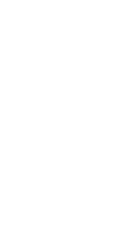

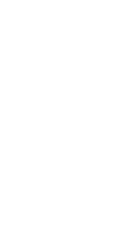

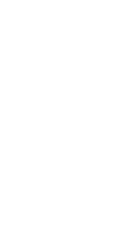

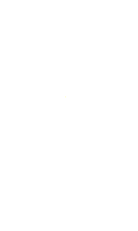

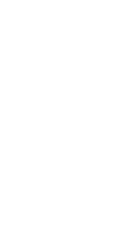

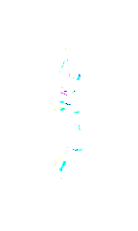

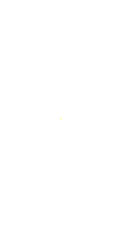

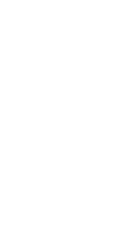

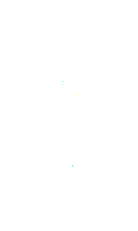

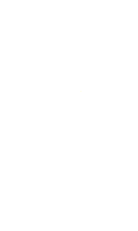

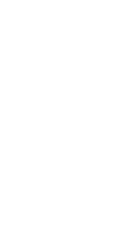

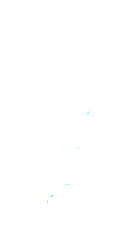

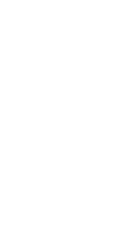

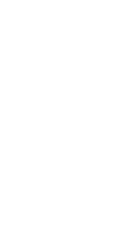

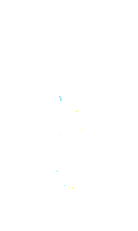

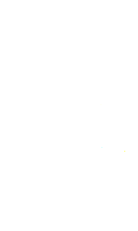

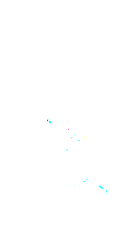

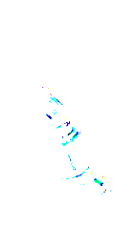

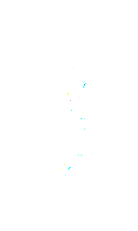

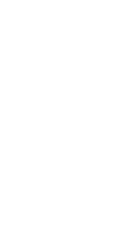

In [14]:
for i in range(20):
  augmented_image = data_augmentation(batch)
  plt.imshow(augmented_image[0])
  plt.axis("off")
  plt.show()

In [15]:
train_data_dir = "/content/drive/My Drive/Colab Notebooks/Chessman-image-dataset/Chess"
image_size = (229, 131)

dataset = image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
)

Found 552 files belonging to 6 classes.


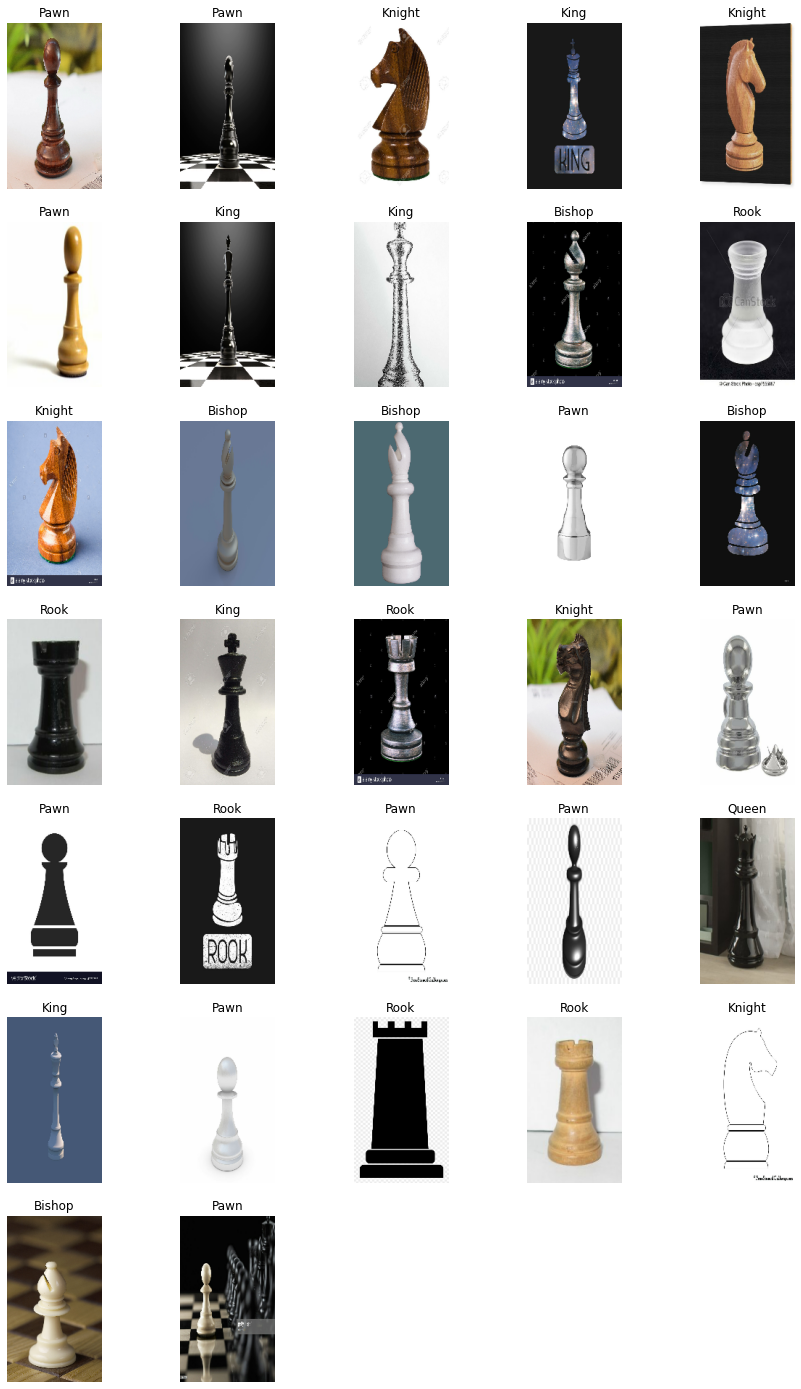

In [16]:
plt.figure(figsize=(15, 25))
class_names = dataset.class_names
for images, labels in dataset.take(1):
    for i in range(32):
        plt.subplot(7, 5, i + 1)
        plt.imshow(np.array(images[i]).astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
train_data_dir = "/content/drive/My Drive/Colab Notebooks/Chessman-image-dataset/Chess"
image_size = (229, 131)

In [18]:
train_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset="training",
    label_mode="categorical",
    image_size=image_size
)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    seed=1,
    subset="validation",
    label_mode="categorical",
    image_size=image_size
)

Found 552 files belonging to 6 classes.
Using 442 files for training.
Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom((-0.1,0.1)),
    RandomContrast(0.05),  
    RandomTranslation(0.1,0.1)
])

In [21]:
# CNN 
model = Sequential()
model.add(InputLayer(input_shape=(229, 131, 3)))
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(2, activation='softmax', kernel_initializer=tf.keras.initializers.Constant(0.01)))
model.add(Dense(6, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [22]:
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=50,
    verbose=1)

Epoch 1/50


14/14 [==============================] - 97s 6s/step - loss: 1.8125 - accuracy: 0.1380 - val_loss: 1.7764 - val_accuracy: 0.1909
Epoch 2/50
14/14 [==============================] - 71s 5s/step - loss: 1.7804 - accuracy: 0.1719 - val_loss: 1.7792 - val_accuracy: 0.1909
Epoch 3/50
14/14 [==============================] - 68s 5s/step - loss: 1.7830 - accuracy: 0.2104 - val_loss: 1.7786 - val_accuracy: 0.2182
Epoch 4/50
14/14 [==============================] - 69s 5s/step - loss: 1.7803 - accuracy: 0.1991 - val_loss: 1.7780 - val_accuracy: 0.1909
Epoch 5/50
14/14 [==============================] - 67s 5s/step - loss: 1.7751 - accuracy: 0.2081 - val_loss: 1.7773 - val_accuracy: 0.2182
Epoch 6/50
14/14 [==============================] - 70s 5s/step - loss: 1.7772 - accuracy: 0.2127 - val_loss: 1.7777 - val_accuracy: 0.2364
Epoch 7/50
14/14 [==============================] - 68s 5s/step - loss: 1.7805 - accuracy: 0.2036 - val_loss: 1.7789 - val_accuracy: 0.2182
Epoch 8/50
14/14 [=============

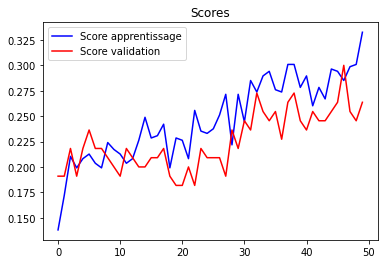

In [25]:
plot_scores(history)

In [26]:
model = Sequential()
model.add(InputLayer(input_shape=(229, 131, 3)))
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(6, activation='softmax', kernel_initializer=tf.keras.initializers.Constant(0.01)))


model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [27]:
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=50,
    verbose=1)

Epoch 1/50


14/14 [==============================] - 544s 39s/step - loss: 1.7921 - accuracy: 0.1742 - val_loss: 1.7863 - val_accuracy: 0.2182
Epoch 2/50
14/14 [==============================] - 537s 39s/step - loss: 1.7901 - accuracy: 0.1833 - val_loss: 1.7795 - val_accuracy: 0.2182
Epoch 3/50
14/14 [==============================] - 535s 38s/step - loss: 1.7889 - accuracy: 0.1855 - val_loss: 1.7795 - val_accuracy: 0.1909
Epoch 4/50
14/14 [==============================] - 540s 39s/step - loss: 1.7854 - accuracy: 0.1900 - val_loss: 1.7807 - val_accuracy: 0.1909
Epoch 5/50
14/14 [==============================] - 535s 38s/step - loss: 1.7888 - accuracy: 0.1878 - val_loss: 1.7716 - val_accuracy: 0.1818
Epoch 6/50
14/14 [==============================] - 535s 38s/step - loss: 1.7883 - accuracy: 0.2285 - val_loss: 1.7876 - val_accuracy: 0.2636
Epoch 7/50
14/14 [==============================] - 536s 38s/step - loss: 1.7872 - accuracy: 0.2330 - val_loss: 1.7750 - val_accuracy: 0.2364
Epoch 8/50
14/14 

KeyboardInterrupt: ignored

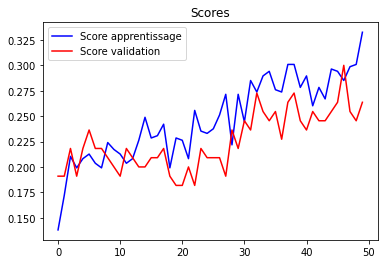

In [28]:
plot_scores(history)

In [29]:
from tensorflow.keras.applications import Xception
xception = Xception(weights='imagenet', include_top=False, input_shape=(229,131,3))
xception.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [30]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(scale=1./255))
model.add(xception)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

In [31]:
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=10,
    verbose=1)

Epoch 1/10


14/14 [==============================] - 78s 5s/step - loss: 1.7662 - accuracy: 0.3032 - val_loss: 1.3325 - val_accuracy: 0.5727
Epoch 2/10
14/14 [==============================] - 69s 5s/step - loss: 1.1730 - accuracy: 0.5950 - val_loss: 1.0210 - val_accuracy: 0.6727
Epoch 3/10
14/14 [==============================] - 66s 5s/step - loss: 0.9484 - accuracy: 0.6652 - val_loss: 0.7934 - val_accuracy: 0.7364
Epoch 4/10
14/14 [==============================] - 68s 5s/step - loss: 0.8824 - accuracy: 0.6742 - val_loss: 0.7300 - val_accuracy: 0.7455
Epoch 5/10
14/14 [==============================] - 64s 5s/step - loss: 0.7448 - accuracy: 0.7398 - val_loss: 0.7052 - val_accuracy: 0.7545
Epoch 6/10
14/14 [==============================] - 66s 5s/step - loss: 0.6432 - accuracy: 0.7670 - val_loss: 0.6874 - val_accuracy: 0.7455
Epoch 7/10
14/14 [==============================] - 64s 5s/step - loss: 0.5792 - accuracy: 0.8009 - val_loss: 0.6826 - val_accuracy: 0.7273
Epoch 8/10
14/14 [=============

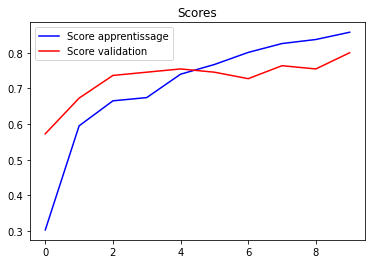

In [32]:
plot_scores(history)